<a href="https://colab.research.google.com/github/ucfilho/marquesgabi/blob/master/Mahotas_Fracionado_teste_003_nov_11_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mahotas

In [0]:
# proximas etapas que falta : dividir a foto em 10x10 e aplicar o mahotas em cada foto
# encontrar 
# GLCM?
# COLOCAR MAIS VARIAVEIS NAS FOTOS
# VER QUAIS PARAMETROS USAR PARA CALCULAR O PSD (particle size distribution)
# GERAR AS IMAGENS ARTIFICIAIS

In [0]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage import io, util
import mahotas.features.texture as mht
import mahotas.features
import os 
import zipfile
from skimage import filters
from skimage import exposure
import skimage.feature as sk
from google.colab import files
from numpy import linalg as LA
%matplotlib inline

In [4]:
!wget http://ftp.feq.ufu.br/ubirajara/Sugar_set_30_2019.zip
#!ls -l trash_nov_22_2018.zip

--2019-11-11 20:59:54--  http://ftp.feq.ufu.br/ubirajara/Sugar_set_30_2019.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19584173 (19M) [application/zip]
Saving to: ‘Sugar_set_30_2019.zip.6’

Sugar_set_30_2019.z 100%[===================>]  18.68M  6.70MB/s    in 2.8s    

2019-11-11 20:59:58 (6.70 MB/s) - ‘Sugar_set_30_2019.zip.6’ saved [19584173/19584173]



In [0]:
# https://buildmedia.readthedocs.org/media/pdf/mahotas/latest/mahotas.pdf

# Why there are only 13 features implemented? (pag 42)
# Only the first 13 features are implemented. The last (14th) feature is 
# normally considered to be unstable, although it
# is not clear to me why this is. (See this unanswered question on Cross-validated).

# What mahotas.features.haralick return as answer?  (pag 58)
# mahotas.features.haralick returns features in 4 directions. 
# We just take the mean (sometimes you use the spread ptp() too).

# Who uses mahotas? (pag 62)
# In June 2016, there were 34 papers citing the mahotas paper




In [0]:
file_name = zipfile.ZipFile('Sugar_set_30_2019.zip', 'r')
file_name.extractall()

In [0]:
# all images are resized in variable x, are in gray in variable p and in variable w are dataframe
FILE='Sugar_set_30_2019.zip'
img_name=[]
x=[]
p=[]
w=[]
Size=64 # tamanho da foto
Sub_Size=4 # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #x.append(cv2.imread(name))
        x.append(cv2.resize(cv2.imread(name),(Size,Size)))

nrow=len(img_name)
ncol=Size*Size
pp=np.zeros((nrow,ncol))
for i in range(nrow):
    w.append(cv2.cvtColor(np.array(x[i]), cv2.COLOR_BGR2GRAY))
    pp[i,:]=w[i].ravel()

--2019-11-11 21:00:00--  http://ftp.feq.ufu.br/ubirajara/TesteSugarAbr25.zip
Resolving ftp.feq.ufu.br (ftp.feq.ufu.br)... 200.19.144.11
Connecting to ftp.feq.ufu.br (ftp.feq.ufu.br)|200.19.144.11|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158733 (155K) [application/zip]
Saving to: ‘TesteSugarAbr25.zip.11’

TesteSugarAbr25.zip 100%[===================>] 155.01K   223KB/s    in 0.7s    

2019-11-11 21:00:01 (223 KB/s) - ‘TesteSugarAbr25.zip.11’ saved [158733/158733]



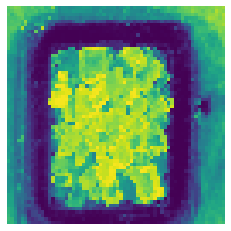

In [7]:
!wget http://ftp.feq.ufu.br/ubirajara/TesteSugarAbr25.zip

file_name = zipfile.ZipFile('TesteSugarAbr25.zip', 'r')
file_name.extractall()
# all images are load in variable x...
FILE='TesteSugarAbr25.zip'
img_name=[]
xw=[]
ww=[]

with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        #xw.append(cv2.imread(name))
        xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

nrow=len(img_name)
ncol=Size*Size
pw=np.zeros((nrow,ncol))
#pw=[]
for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()

plt.axis("off")
plt.imshow(ww[0])

In [0]:
Nomes=['ASM','constrast','correl','variance','inv diff mom','sum aveg',
       'sum var','sum entropy','entropy','dif var','dif entropy','IMC1',
       'IMC2']


In [10]:
#foto 0 (k=0)
k=0
#p_foto=pp[k,:].reshape(Size,Size)
p_foto=pw[k,:].reshape(Size,Size)
GLCM=[]
glcm_haralick=[]
x_ref=[]
Count=Sub_Size
p=np.zeros((Sub_Size,Sub_Size))
j_ref=0
for k in range(Size):
  if((k+Sub_Size-1)<Size):
    for i in range(Sub_Size):
      for j in range(Sub_Size):
        p[i,j]=p_foto[Crop+i,j+k]
      
    x_ref.append(Count-Sub_Size)
    Count=Count+1
    
    Mahotas =pd.DataFrame(mahotas.features.haralick(p.astype(int)), columns =Nomes)
    
    GLCM=[]
    for ii in Nomes:
      GLCM.append(Mahotas[ii].mean())
      #print('cheguei aqui!!!')
    glcm_haralick.append(GLCM)

df=pd.DataFrame(glcm_haralick,columns=Nomes)
print(df)

         ASM   constrast    correl  ...  dif entropy      IMC1      IMC2
0   0.051890  304.451389  0.426923  ...     2.937970 -0.709995  0.995571
1   0.050347  401.979167 -0.140504  ...     2.946888 -0.771070  0.997749
2   0.050347  542.611111 -0.165784  ...     3.054323 -0.795088  0.998319
3   0.052083  694.041667  0.416972  ...     3.028384 -0.799709  0.998302
4   0.054687  717.236111  0.535052  ...     3.012657 -0.732306  0.996072
..       ...         ...       ...  ...          ...       ...       ...
56  0.053434  479.666667 -0.007287  ...     2.905222 -0.770791  0.997572
57  0.050347  247.638889  0.362012  ...     2.884252 -0.795046  0.998326
58  0.049479  202.604167  0.406966  ...     2.972828 -0.814956  0.998732
59  0.049479  133.326389  0.360062  ...     2.986717 -0.814956  0.998732
60  0.050347  170.784722  0.470560  ...     3.044110 -0.817623  0.998692

[61 rows x 13 columns]


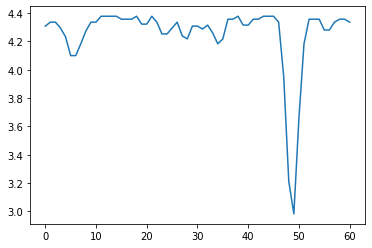

In [11]:
plt.plot(x_ref,df['entropy'])

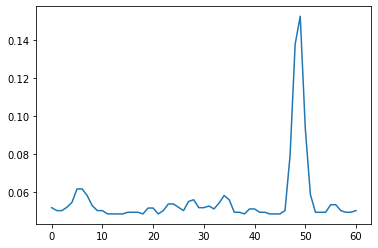

In [12]:
plt.plot(x_ref,df['ASM'])

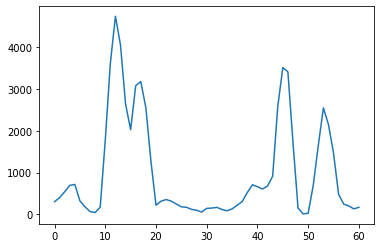

In [13]:
plt.plot(x_ref,df['constrast'])   